In [118]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
# plt.style.use('fivethirtyeight')

# for modeling
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
# from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import OneClassSVM

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [119]:
data = pd.read_csv('/content/secom.csv', sep=' ', header=None) # As the file is space seperated so it need to  specify the delimiter.
label = pd.read_csv('/content/secom_labels.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [120]:
import numpy as np
def labeling(x):
  lst = []
  for st in x:
    lst.append(int(st.split(' ')[0]))
  #return np.reshape(np.array(lst), (-1,1))
  return lst


In [121]:
# converting the label into integer value from string
y = label.apply(labeling)
y.head()

,0
0,-1
1,-1
2,1
3,-1
4,-1


In [122]:
data['Pass_Fail'] = y

In [123]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

display(summary(data).sort_values(by='Nulls', ascending=False))

Data shape: (1567, 591)
___________________________
Data Types:
Types
float64    590
int64        1
Name: count, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
157,float64,138,129,1429,0.0118,0.2876
292,float64,138,93,1429,0.0041,0.0831
293,float64,138,139,1429,82.3233,879.2260
158,float64,138,139,1429,234.0996,2505.2998
492,float64,226,227,1341,4.8882,21.0443
...,...,...,...,...,...,...
120,float64,1567,1269,0,5.1259,7.5220
156,float64,1567,722,0,0.0111,2.2016
495,float64,1567,964,0,1.7720,107.6926
494,float64,1567,894,0,0.0342,127.5728


In [124]:
def null_values(df):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

In [125]:
df_na = null_values(data)
df_na

,Missing_Records,Percentage (%)
292,1429,91.193363
293,1429,91.193363
157,1429,91.193363
158,1429,91.193363
358,1341,85.577537
...,...,...
456,1,0.063816
218,1,0.063816
356,1,0.063816
457,1,0.063816


In [126]:
df_na = df_na[df_na["Percentage (%)"] > 50]
df_na

,Missing_Records,Percentage (%)
292,1429,91.193363
293,1429,91.193363
157,1429,91.193363
158,1429,91.193363
358,1341,85.577537
85,1341,85.577537
492,1341,85.577537
220,1341,85.577537
518,1018,64.964901
246,1018,64.964901


In [127]:
df_na.shape

(28, 2)

In [128]:
df_na.index

Index([292, 293, 157, 158, 358,  85, 492, 220, 518, 246, 245, 516, 517, 110,
       384, 382, 383, 109, 244, 111, 580, 578, 581, 579,  73,  72, 345, 346],
      dtype='object')

In [129]:
data = data.drop(axis=1, columns=df_na.index)
data.shape

(1567, 563)

In [130]:
#strategy 1: latest information available
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass_Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0096,0.0201,0.0060,208.2045,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4333,-0.0061,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [131]:
null_values(data)

,Missing_Records,Percentage (%)


In [132]:
data.shape

(1567, 563)

In [133]:
def unique_columns(df):
    """a function to show unique columns with column name"""
    uni_col_list = []
    for column in df.columns:
        if df[column].nunique() == 1:
            uni_col_list.append(column)
    return uni_col_list

In [134]:
len(unique_columns(data))

116

In [135]:
data = data.drop(axis=1, columns=unique_columns(data))
data.shape

(1567, 447)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 447 entries, 0 to Pass_Fail
dtypes: float64(446), int64(1)
memory usage: 5.3 MB


We now have cleaner records than before. All values are metric and not NA values.

- We have 1567 rows and 447 columns before modeling


##EDA (Exploratory Data Analysis)

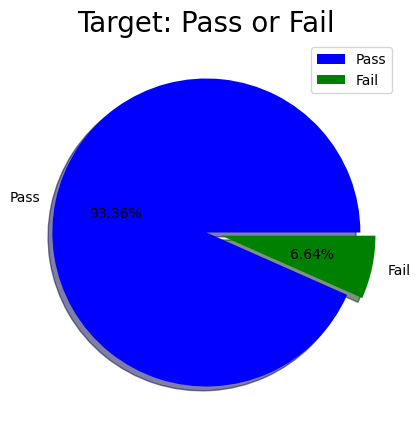

,count
Pass_Fail,
-1,1463
1,104


In [137]:
# pie chart
# We have highly imbalanced class with only 6.6% failures and 93.4% pass

plt.rcParams['figure.figsize'] = (5,5)
labels = ['Pass', 'Fail']
size = data['Pass_Fail'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()
data["Pass_Fail"].value_counts()

In [138]:
data.corr()["Pass_Fail"].sort_values()

,Pass_Fail
28,-0.107685
316,-0.089071
125,-0.083460
26,-0.082052
180,-0.078530
...,...
348,0.129593
510,0.131574
103,0.149118
59,0.155991


##Data Cleaning/Preprocessing

In [139]:
# Remove the highly collinear features from data
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.

    Inputs:
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output:
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [140]:
#Remove columns having more than 70% correlation
#Both positive and negative correlations are considered here
data = remove_collinear_features(data,0.70)

17 | 11 | 0.79
22 | 21 | 0.73
26 | 25 | 0.82
27 | 25 | 0.98
27 | 26 | 0.79
30 | 29 | 0.86
34 | 32 | 0.75
35 | 34 | 0.77
36 | 32 | 0.75
36 | 34 | 1.0
36 | 35 | 0.77
39 | 34 | 0.8
39 | 36 | 0.8
46 | 45 | 0.81
50 | 46 | 0.9
51 | 47 | 0.71
54 | 53 | 0.94
60 | 43 | 0.89
65 | 64 | 0.84
66 | 46 | 0.82
66 | 50 | 0.76
70 | 46 | 0.8
70 | 50 | 0.77
70 | 62 | 0.73
70 | 66 | 0.9
96 | 94 | 0.96
98 | 94 | 0.84
98 | 96 | 0.87
101 | 94 | 0.73
101 | 96 | 0.79
101 | 98 | 0.91
104 | 99 | 0.99
105 | 92 | 0.99
106 | 93 | 0.99
123 | 121 | 0.94
124 | 121 | 0.89
124 | 123 | 0.86
125 | 122 | 0.71
127 | 122 | 0.96
130 | 122 | 0.83
130 | 127 | 0.79
140 | 4 | 1.0
147 | 16 | 0.89
148 | 16 | 0.97
148 | 147 | 0.89
152 | 16 | 0.98
152 | 147 | 0.9
152 | 148 | 0.99
154 | 16 | 0.87
154 | 147 | 0.8
154 | 148 | 0.94
154 | 152 | 0.89
155 | 19 | 0.8
163 | 26 | 0.71
163 | 159 | 0.76
164 | 26 | 0.77
164 | 159 | 0.8
164 | 163 | 0.92
165 | 26 | 0.74
165 | 159 | 0.79
165 | 163 | 0.9
165 | 164 | 0.96
174 | 172 | 1.0
185 | 184 | 0.

In [141]:
data.shape

(1567, 205)

##Iteration 1: (Unbalanced data)

In [142]:
# separating the dependent and independent data
X = data.drop('Pass_Fail', axis=1)
y = data['Pass_Fail']

# getting the shapes of new data sets x and y
print("shape of X:", X.shape)
print("shape of y:", y.shape)

shape of X: (1567, 204)
shape of y: (1567,)


In [143]:
# the function train_test_split creates random data samples (default: 75-25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)  # seed for comparable results

In [144]:
# gettiing the shapes
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of X_train:  (1175, 204)
shape of X_test:  (392, 204)
shape of y_train:  (1175,)
shape of y_test:  (392,)


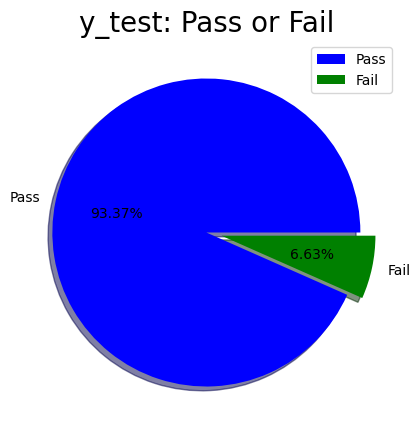

In [145]:
# Let's check if the pass / fail ratio is preserved in y_test data.
size = y_test.value_counts()
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('y_test: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()

###Data Scaling

In [146]:
# standardization
# from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [147]:
cv_acc = {}
cv_TPR = {}
cv_FPR = {}
cv_Precision = {}
cv_Fscore = {}

Precision = TP ÷ (TP + FP)
<br>
Recall = TP ÷ (TP + FN)
<br>
F1 = 2 * (precision * recall) / (precision + recall)
<br>
The following equations considered 1 as positive.

In [148]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [149]:
def plot_result(model, name:str):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation based on a 10-fold cross-validation
    scoring = ['balanced_accuracy', 'recall_macro']
    scores = cross_val_score(model, X_test, y_test, cv=10, scoring = 'balanced_accuracy')
    cv_acc[name] = round(scores.mean(), 4)*100  # balanced accuracy
    cv_TPR[name] = (confusion_matrix(y_test, y_pred)[1][1]/confusion_matrix(y_test, y_pred)[1].sum())*100  # recall (Max)
    cv_FPR[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())*100  # fallout (Min)
    cm = confusion_matrix(y_test, y_pred)
    cv_Precision[name] = confusion_matrix(y_test, y_pred)[1][1]/(confusion_matrix(y_test, y_pred)[1][1]+confusion_matrix(y_test, y_pred)[0][1])
    cv_Fscore[name] = 2 * (cv_Precision[name] * cv_TPR[name]) / (cv_Precision[name] + cv_TPR[name])
    print('Average Balanced Accuracy (CV=10):', scores.mean())

    # print classification report
    print(classification_report(y_test, y_pred, zero_division=0))
    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

Average Balanced Accuracy (CV=10): 0.5766141141141141
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



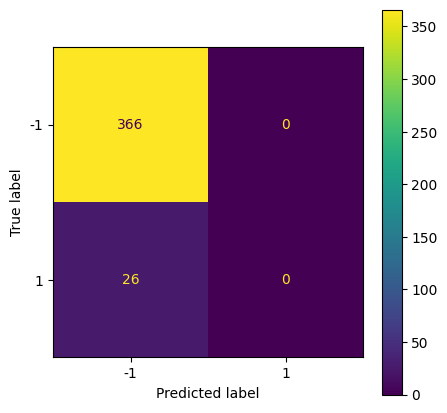

In [150]:
# 1-Decision Tree
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)
plot_result(dtc, "dtc")

Average Balanced Accuracy (CV=10): 0.5058558558558558
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       366
           1       0.09      0.12      0.10        26

    accuracy                           0.86       392
   macro avg       0.51      0.52      0.51       392
weighted avg       0.88      0.86      0.87       392



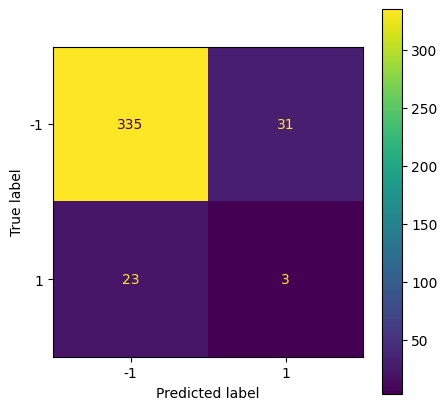

In [151]:
# 2-Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=150)
plot_result(lr, "lr")

Average Balanced Accuracy (CV=10): 0.5
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



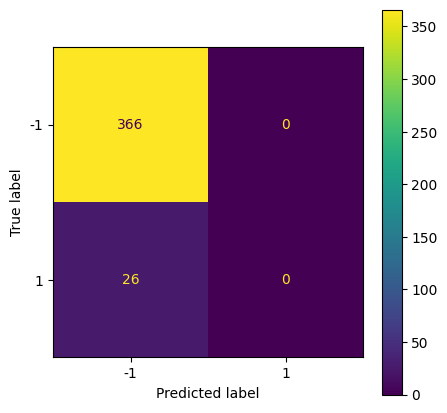

In [152]:
# 3-SVM
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel='rbf', gamma='scale')  # default values
plot_result(svc, "svc")

Average Balanced Accuracy (CV=10): 0.5
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



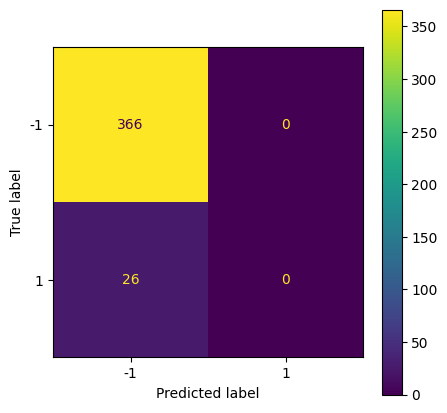

In [153]:
# 4-Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None)
plot_result(rfc, "rfc")


In [154]:
def plot_feature_importances(model):
    feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)[:10]

    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.title("Feature Importance")
    plt.show()

    print(f"Top 10 Feature Importance for {str(model).split('(')[0]}\n\n",feature_imp[:10],sep='')

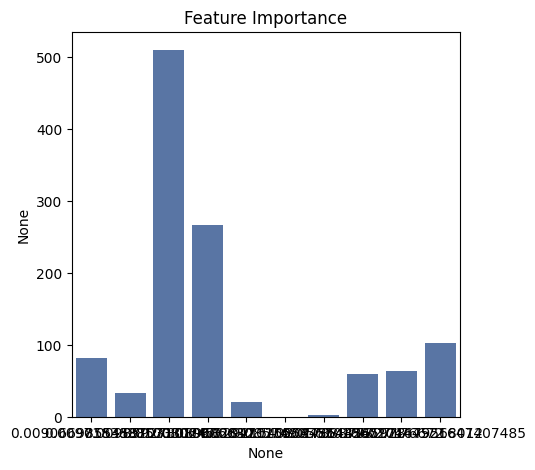

Top 10 Feature Importance for RandomForestClassifier

103    0.020445
64     0.018672
59     0.017389
2      0.010505
0      0.010471
21     0.010307
267    0.010081
510    0.009859
33     0.009718
81     0.009067
dtype: float64


In [155]:
plot_feature_importances(rfc)

Average Balanced Accuracy (CV=10): 0.6058558558558558
              precision    recall  f1-score   support

          -1       0.94      0.93      0.94       366
           1       0.18      0.23      0.20        26

    accuracy                           0.88       392
   macro avg       0.56      0.58      0.57       392
weighted avg       0.89      0.88      0.89       392



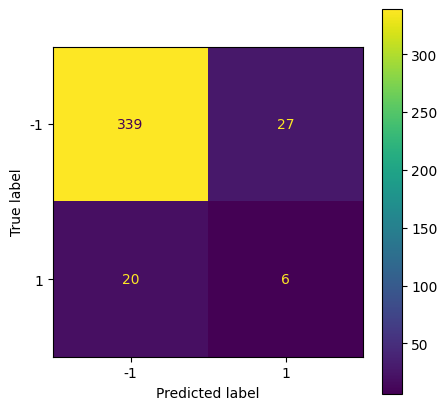

In [156]:
# 5-Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=3, random_state=42)
plot_result(gbc, "gbc")

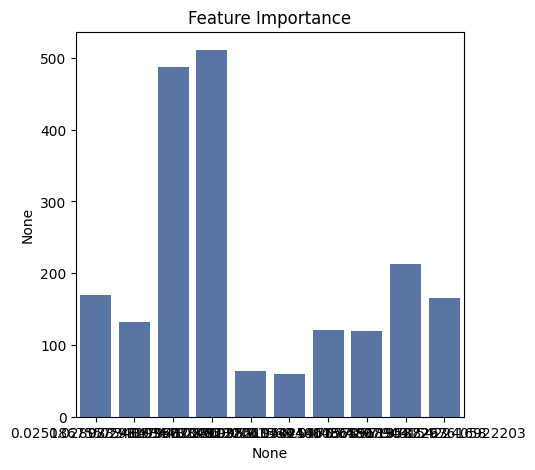

Top 10 Feature Importance for GradientBoostingClassifier

166    0.195373
213    0.048079
120    0.047557
121    0.043440
59     0.038212
64     0.038100
511    0.035733
488    0.029820
132    0.028983
169    0.025187
dtype: float64


In [157]:
plot_feature_importances(gbc)

Average Balanced Accuracy (CV=10): 0.5826576576576576
              precision    recall  f1-score   support

          -1       0.98      0.36      0.52       366
           1       0.09      0.88      0.16        26

    accuracy                           0.39       392
   macro avg       0.53      0.62      0.34       392
weighted avg       0.92      0.39      0.50       392



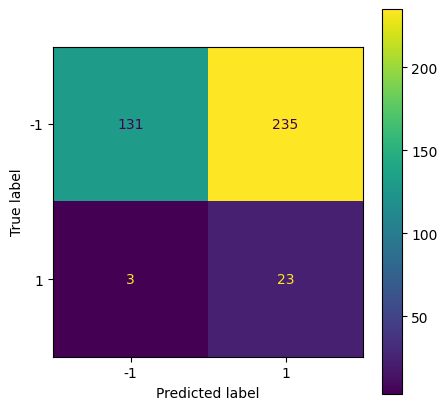

In [158]:
# 6-Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
plot_result(nb, "nb")

Average Balanced Accuracy (CV=10): 0.544557057057057
              precision    recall  f1-score   support

          -1       0.94      0.98      0.96       366
           1       0.25      0.08      0.12        26

    accuracy                           0.92       392
   macro avg       0.59      0.53      0.54       392
weighted avg       0.89      0.92      0.90       392



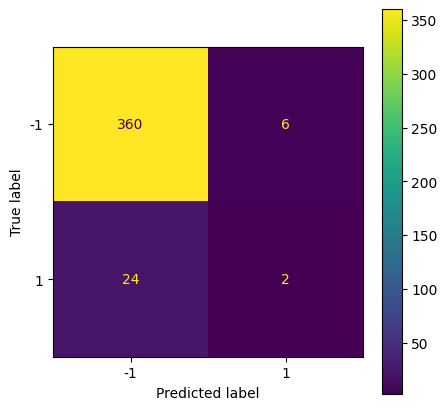

In [159]:
# 7-kNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
plot_result(knn, "knn")

##Evaluation (iteration 1)

In [160]:
cv_acc

{'dtc': 57.66,
 'lr': 50.59,
 'svc': 50.0,
 'rfc': 50.0,
 'gbc': 60.589999999999996,
 'nb': 58.269999999999996,
 'knn': 54.459999999999994}

In [161]:
cv_Precision

{'dtc': nan,
 'lr': 0.08823529411764706,
 'svc': nan,
 'rfc': nan,
 'gbc': 0.18181818181818182,
 'nb': 0.08914728682170543,
 'knn': 0.25}

In [162]:
cv_TPR # TPR or recall

{'dtc': 0.0,
 'lr': 11.538461538461538,
 'svc': 0.0,
 'rfc': 0.0,
 'gbc': 23.076923076923077,
 'nb': 88.46153846153845,
 'knn': 7.6923076923076925}

In [163]:
cv_FPR

{'dtc': 0.0,
 'lr': 8.469945355191257,
 'svc': 0.0,
 'rfc': 0.0,
 'gbc': 7.377049180327869,
 'nb': 64.20765027322405,
 'knn': 1.639344262295082}

In [164]:
df_eval = pd.DataFrame(data={'model': list(cv_acc.keys()), 'bal_acc': list(cv_acc.values()), 'recall': list(cv_TPR.values()), 'fallout':list(cv_FPR.values())})
df_eval

,model,bal_acc,recall,fallout
0,dtc,57.66,0.000000,0.000000
1,lr,50.59,11.538462,8.469945
2,svc,50.00,0.000000,0.000000
3,rfc,50.00,0.000000,0.000000
4,gbc,60.59,23.076923,7.377049
5,nb,58.27,88.461538,64.207650
6,knn,54.46,7.692308,1.639344


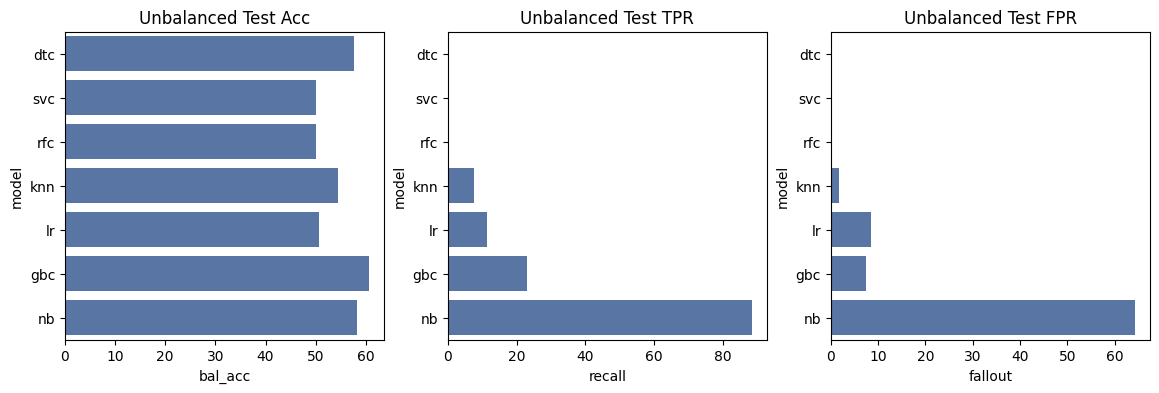

In [165]:
fig, ax = plt.subplots(1,3, figsize=(14, 4))
sns.barplot(x="bal_acc", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0])
ax[0].set_title("Unbalanced Test Acc")
sns.barplot(x="recall", y="model", data=df_eval.sort_values(by="recall"), ax=ax[1])
ax[1].set_title("Unbalanced Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval.sort_values(by="recall"), ax=ax[2])
ax[2].set_title("Unbalanced Test FPR")
plt.show()

NaiveBayes gave high BalanceAccuracy and TPR_Score (Recall), but it gave the poor FPR_Score (Fallout) in this unbalanced data set.

##Iteration 2: (with SMOTE)

Balancing data

In [166]:
y_test.value_counts(normalize=True)

,proportion
Pass_Fail,
-1,0.933673
1,0.066327


In [167]:
y_train.value_counts(normalize=True)

,proportion
Pass_Fail,
-1,0.933617
1,0.066383


In [168]:
# pip install imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [169]:
oversmote = SMOTE()
X_train_os, y_train_os= oversmote.fit_resample(X_train, y_train)

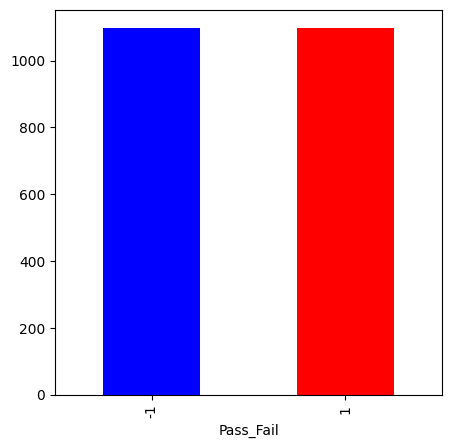

In [170]:
y_train_os.value_counts().plot.bar(color=["blue", "red"])
plt.show()

In [171]:
X_train_os.shape

(2194, 204)

In [172]:
cv_acc_balance = {}
cv_TPR_balance = {}
cv_FPR_balance = {}
cv_Precision_balance = {}
cv_Fscore_balance = {}

In [173]:
def plot_result_smote(model, name:str):
    model.fit(X_train_os, y_train_os)
    y_pred = model.predict(X_test)

    # Evaluation based on a 10-fold cross-validation
    scoring = ['balanced_accuracy', 'recall_macro']
    scores = cross_val_score(model, X_test, y_test, cv=10, scoring = 'balanced_accuracy')
    cv_acc_balance[name] = round(scores.mean(), 4)*100  # balanced accuracy
    cv_TPR_balance[name] = (confusion_matrix(y_test, y_pred)[1][1]/confusion_matrix(y_test, y_pred)[1].sum())*100  # recall (maximieren)
    cv_FPR_balance[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())*100  # fallout (minimieren)
    cm = confusion_matrix(y_test, y_pred)
    cv_Precision_balance[name] = confusion_matrix(y_test, y_pred)[1][1]/(confusion_matrix(y_test, y_pred)[1][1]+confusion_matrix(y_test, y_pred)[0][1])
    cv_Fscore_balance[name] = 2 * (cv_Precision_balance[name] * cv_TPR_balance[name]) / (cv_Precision_balance[name] + cv_TPR_balance[name])
    print('Average Balanced Accuracy (CV=10):', scores.mean())

    # print classification report
    print(classification_report(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

Average Balanced Accuracy (CV=10): 0.5766141141141141
              precision    recall  f1-score   support

          -1       0.95      0.91      0.93       366
           1       0.23      0.38      0.29        26

    accuracy                           0.87       392
   macro avg       0.59      0.65      0.61       392
weighted avg       0.91      0.87      0.89       392



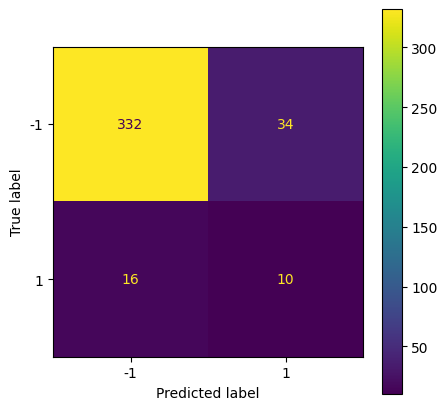

In [174]:
# Decision tree
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)

plot_result_smote(dtc, "dtc")

Average Balanced Accuracy (CV=10): 0.5058558558558558
              precision    recall  f1-score   support

          -1       0.94      0.85      0.89       366
           1       0.08      0.19      0.12        26

    accuracy                           0.81       392
   macro avg       0.51      0.52      0.51       392
weighted avg       0.88      0.81      0.84       392



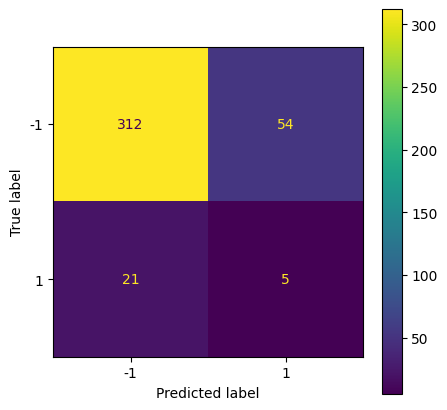

In [175]:
# Logistic Regression
lr = LogisticRegression(max_iter=200)
plot_result_smote(lr, "lr")

Average Balanced Accuracy (CV=10): 0.5
              precision    recall  f1-score   support

          -1       0.93      0.99      0.96       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



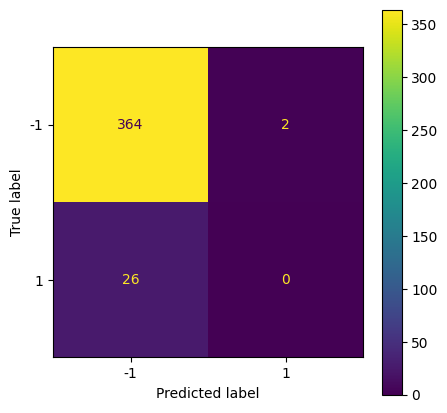

In [176]:
# SVC
svc = SVC(C=1.0, kernel='rbf', gamma='scale')  # default Werte
plot_result_smote(svc, "svc")

Average Balanced Accuracy (CV=10): 0.5
              precision    recall  f1-score   support

          -1       0.93      0.99      0.96       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



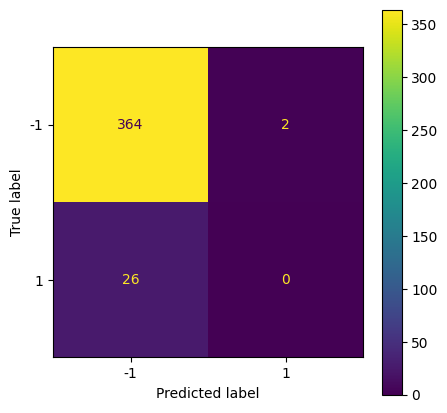

In [177]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None)
plot_result_smote(rfc, "rfc")

Average Balanced Accuracy (CV=10): 0.6058558558558558
              precision    recall  f1-score   support

          -1       0.94      0.97      0.96       366
           1       0.27      0.15      0.20        26

    accuracy                           0.92       392
   macro avg       0.60      0.56      0.58       392
weighted avg       0.90      0.92      0.91       392



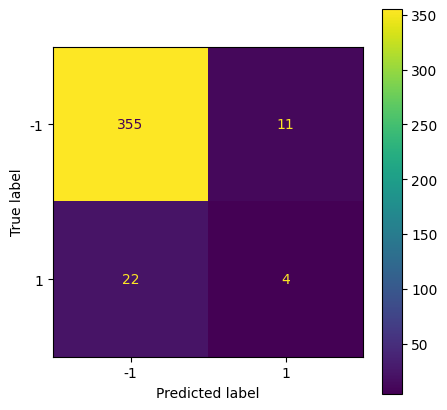

In [178]:
# Gradient Boost
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=3, random_state=42)
plot_result_smote(gbc, "gbc")

Average Balanced Accuracy (CV=10): 0.5826576576576576
              precision    recall  f1-score   support

          -1       0.96      0.52      0.68       366
           1       0.10      0.73      0.17        26

    accuracy                           0.54       392
   macro avg       0.53      0.63      0.43       392
weighted avg       0.91      0.54      0.64       392



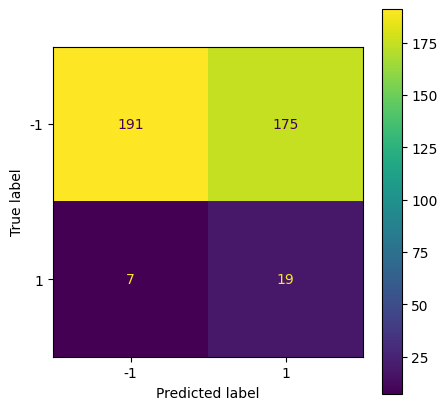

In [179]:
# Naive Bayes
nb = GaussianNB()
plot_result_smote(nb, "nb")

Average Balanced Accuracy (CV=10): 0.544557057057057
              precision    recall  f1-score   support

          -1       0.96      0.30      0.45       366
           1       0.08      0.81      0.14        26

    accuracy                           0.33       392
   macro avg       0.52      0.55      0.29       392
weighted avg       0.90      0.33      0.43       392



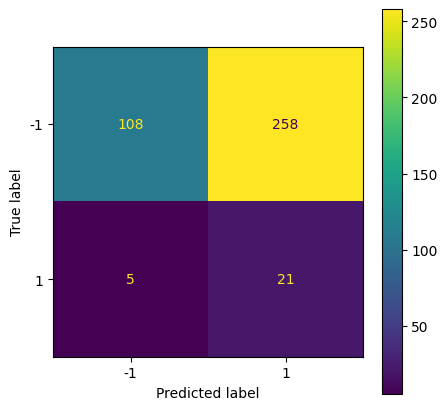

In [180]:
# kNN
knn = KNeighborsClassifier(n_neighbors=3)
plot_result_smote(knn, "knn")

In [181]:
df_eval_smote = pd.DataFrame(data={'model': list(cv_acc_balance.keys()), 'bal_acc': list(cv_acc_balance.values()), 'recall': list(cv_TPR_balance.values()), 'fallout':list(cv_FPR_balance.values())})
df_eval_smote

,model,bal_acc,recall,fallout
0,dtc,57.66,38.461538,9.289617
1,lr,50.59,19.230769,14.754098
2,svc,50.00,0.000000,0.546448
3,rfc,50.00,0.000000,0.546448
4,gbc,60.59,15.384615,3.005464
5,nb,58.27,73.076923,47.814208
6,knn,54.46,80.769231,70.491803


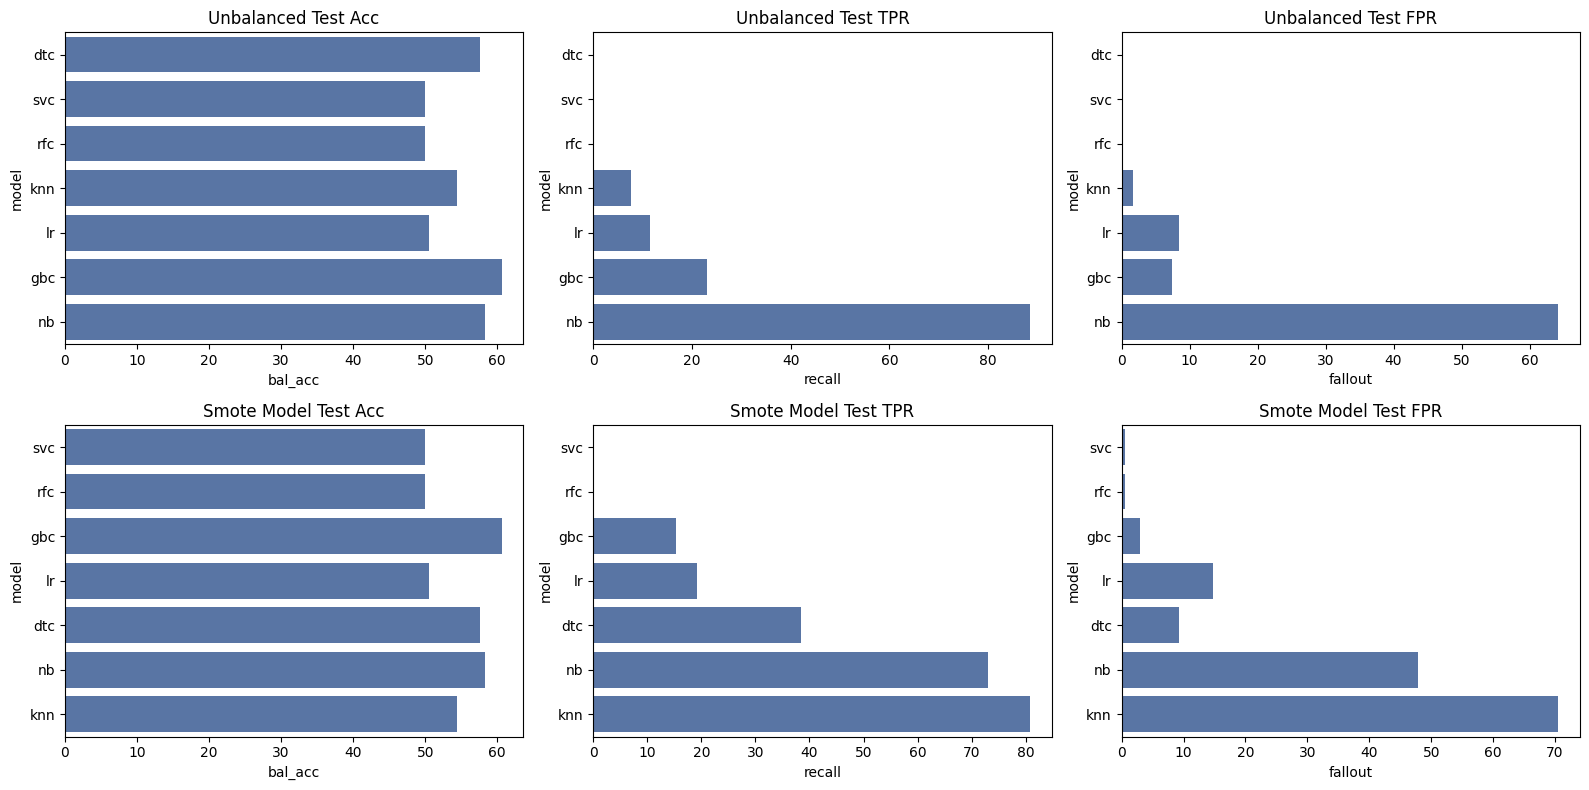

In [182]:
fig, ax = plt.subplots(2,3, figsize=(16, 8))
sns.barplot(x="bal_acc", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,0])
ax[0,0].set_title("Unbalanced Test Acc")
sns.barplot(x="recall", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,1])
ax[0,1].set_title("Unbalanced Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,2])
ax[0,2].set_title("Unbalanced Test FPR")
sns.barplot(x="bal_acc", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,0])
ax[1,0].set_title("Smote Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,1])
ax[1,1].set_title("Smote Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,2])
ax[1,2].set_title("Smote Model Test FPR")
plt.tight_layout()
plt.show()

##Iteration 3: (with SMOTE and Feature Selection Filter method)

In [183]:
from scipy.stats import pearsonr

In [184]:
df_filtered = pd.DataFrame(X_train_os).apply(lambda x: pd.Series(pearsonr(x, y_train_os), index=[0, 1]), axis =0).T.applymap(lambda x: np.round(x,3)).sort_values(by=1, ascending=False)
df_filtered

,0,1
5,0.000,0.994
196,0.000,0.983
145,-0.001,0.946
197,-0.002,0.941
25,0.002,0.908
...,...,...
89,0.239,0.000
86,-0.174,0.000
85,0.201,0.000
77,0.115,0.000


In [185]:
df_filtered = df_filtered[df_filtered[1] <= 0.05]
df_filtered

,0,1
201,0.042,0.047
191,0.043,0.046
87,0.043,0.043
148,-0.044,0.039
188,0.044,0.038
...,...,...
89,0.239,0.000
86,-0.174,0.000
85,0.201,0.000
77,0.115,0.000


In [186]:
df_filtered.index

Index([201, 191,  87, 148, 188, 154, 106,  88, 180,  96,
       ...
       100,  97,  94,  93,  92,  89,  86,  85,  77, 102],
      dtype='int64', length=130)

In [187]:
X_train_os_selected_filter = pd.DataFrame(X_train_os)[df_filtered.index]
X_test_fe = pd.DataFrame(X_test)[df_filtered.index]
X_train_os_selected_filter

,201,191,87,148,188,154,106,88,180,96,...,100,97,94,93,92,89,86,85,77,102
0,-0.176395,0.817595,0.499149,0.246410,-1.402261,-0.398287,0.873178,1.199141,-0.841551,-0.294749,...,0.886472,1.560099,-0.634292,-0.802684,0.295853,1.072203,-1.320060,-0.564271,0.352356,-0.123460
1,-0.846663,-0.895853,-0.438492,1.992043,0.147894,0.170568,0.062918,0.114327,2.194673,0.995382,...,0.026288,0.720093,0.365828,0.125311,-0.125099,-0.285865,1.038302,0.669634,1.481635,0.617068
2,0.190656,-0.898384,-0.303441,-0.293476,-0.495235,0.360187,-0.610671,-0.601861,1.433648,-0.551221,...,1.199266,0.242442,-0.430877,-0.089572,0.080900,0.140987,-0.015764,-0.564271,-0.204218,-1.312008
3,-1.349363,1.342006,-1.287384,1.848073,0.554493,0.355562,0.736508,-1.037190,-0.841551,-1.446929,...,0.573678,-0.992862,0.348877,-0.093336,-1.003784,0.063311,0.072813,-0.358620,0.449151,-0.171595
4,-0.280127,-0.876618,-0.295723,0.192422,-0.477641,-0.615655,-0.434952,-0.710693,-0.841551,1.133332,...,-0.051911,1.247147,-0.278317,-0.610589,0.021058,0.490162,0.376189,0.052682,0.344289,0.276425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,0.212246,-0.415296,-0.351325,0.198030,-0.386634,0.224058,0.075332,-0.223147,-0.051752,-0.879930,...,-0.314100,-0.332669,0.300611,0.805636,-0.229974,0.721608,-0.480357,-0.076760,0.834900,-0.287810
2190,0.045383,-0.486797,-0.767164,-0.392683,-0.674343,0.725323,0.174507,-1.037570,-0.841551,-0.614718,...,-0.591771,-0.756618,0.057729,-0.568074,0.952673,0.462550,0.222954,2.054129,-0.390614,-0.010686
2191,-0.086127,0.224725,-0.426594,-0.206815,-0.293477,0.740872,0.084788,-0.725855,-0.345513,-0.199795,...,-0.591436,-0.686724,-0.040621,0.003867,1.409525,0.025496,0.475614,2.573912,0.117215,0.047731
2192,1.578493,-0.708036,0.030429,-0.276503,1.615383,0.935340,0.511275,0.304089,-0.559474,0.806253,...,-0.836316,0.104563,-0.617690,-1.047555,0.710130,0.763399,-0.918485,0.847727,1.380684,-0.303246


In [188]:
cv_acc_balance_fe = {}
cv_TPR_balance_fe = {}
cv_FPR_balance_fe = {}
cv_Precision_balance_fe = {}
cv_Fscore_balance_fe = {}

In [189]:
def plot_result_smoted_fe(model, name:str):
    model.fit(X_train_os_selected_filter, y_train_os)
    y_pred = model.predict(X_test_fe)

    # Evaluation based on a 10-fold cross-validation
    scoring = ['balanced_accuracy', 'recall_macro']
    scores = cross_val_score(model, X_test_fe, y_test, cv=10, scoring = 'balanced_accuracy')
    cv_acc_balance_fe[name] = round(scores.mean(), 4)*100  # balanced accuracy
    cv_TPR_balance_fe[name] = (confusion_matrix(y_test, y_pred)[1][1]/confusion_matrix(y_test, y_pred)[1].sum())*100  # recall (maximize)
    cv_FPR_balance_fe[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())*100  # fallout (minimize)
    cm = confusion_matrix(y_test, y_pred)
    cv_Precision_balance_fe[name] = confusion_matrix(y_test, y_pred)[1][1]/(confusion_matrix(y_test, y_pred)[1][1]+confusion_matrix(y_test, y_pred)[0][1])
    cv_Fscore_balance_fe[name] = 2 * (cv_Precision_balance_fe[name] * cv_TPR_balance_fe[name]) / (cv_Precision_balance_fe[name] + cv_TPR_balance_fe[name])
    print('Average Balanced Accuracy (CV=10):', scores.mean())

    # print classification report
    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

Average Balanced Accuracy (CV=10): 0.5282282282282283
              precision    recall  f1-score   support

          -1       0.95      0.91      0.93       366
           1       0.23      0.38      0.29        26

    accuracy                           0.87       392
   macro avg       0.59      0.65      0.61       392
weighted avg       0.91      0.87      0.89       392



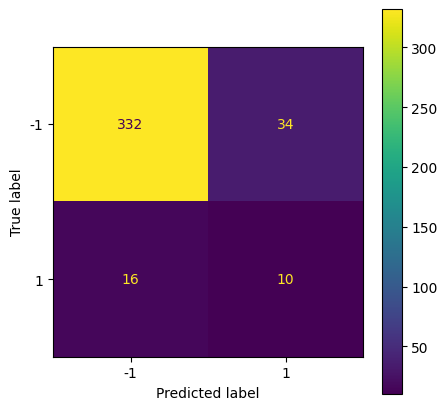

In [190]:
# Decision tree
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)

plot_result_smoted_fe(dtc, "dtc")

Average Balanced Accuracy (CV=10): 0.5351726726726727
              precision    recall  f1-score   support

          -1       0.94      0.84      0.89       366
           1       0.10      0.23      0.13        26

    accuracy                           0.80       392
   macro avg       0.52      0.54      0.51       392
weighted avg       0.88      0.80      0.84       392



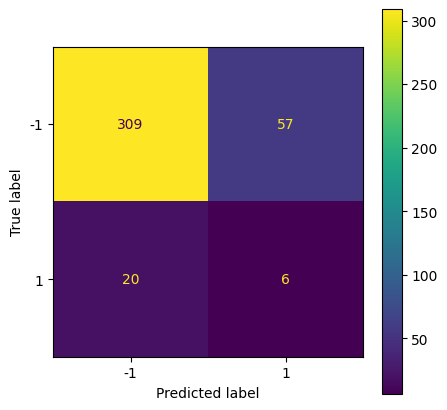

In [191]:
# Logistic Regression
lr = LogisticRegression(max_iter=200)
plot_result_smoted_fe(lr, "lr")

Average Balanced Accuracy (CV=10): 0.5
              precision    recall  f1-score   support

          -1       0.93      0.99      0.96       366
           1       0.00      0.00      0.00        26

    accuracy                           0.92       392
   macro avg       0.47      0.49      0.48       392
weighted avg       0.87      0.92      0.90       392



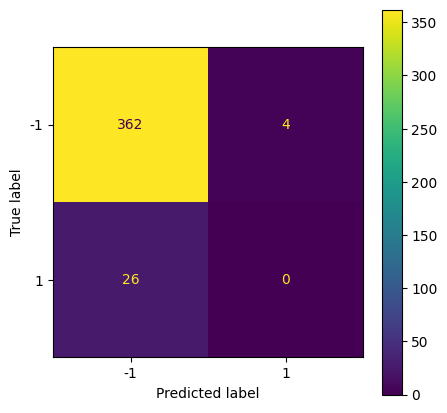

In [192]:
# SVC
svc = SVC(C=1.0, kernel='rbf', gamma='scale')  # default Werte
plot_result_smoted_fe(svc, "svc")

Average Balanced Accuracy (CV=10): 0.5
              precision    recall  f1-score   support

          -1       0.93      0.99      0.96       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



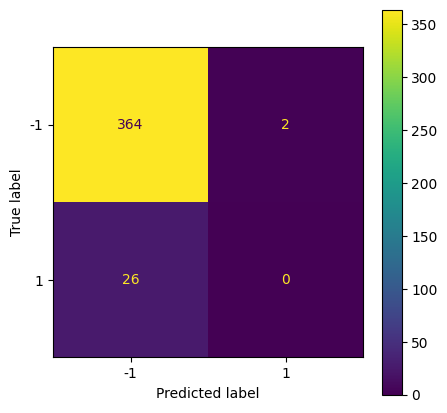

In [193]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None)
plot_result_smoted_fe(rfc, "rfc")

Average Balanced Accuracy (CV=10): 0.525487987987988
              precision    recall  f1-score   support

          -1       0.94      0.96      0.95       366
           1       0.12      0.08      0.09        26

    accuracy                           0.90       392
   macro avg       0.53      0.52      0.52       392
weighted avg       0.88      0.90      0.89       392



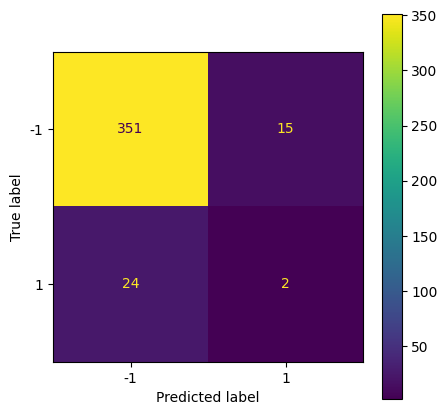

In [194]:
# Gradient Boost
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=3, random_state=42)
plot_result_smoted_fe(gbc, "gbc")

Average Balanced Accuracy (CV=10): 0.5819444444444446
              precision    recall  f1-score   support

          -1       0.95      0.84      0.89       366
           1       0.14      0.38      0.21        26

    accuracy                           0.81       392
   macro avg       0.55      0.61      0.55       392
weighted avg       0.90      0.81      0.85       392



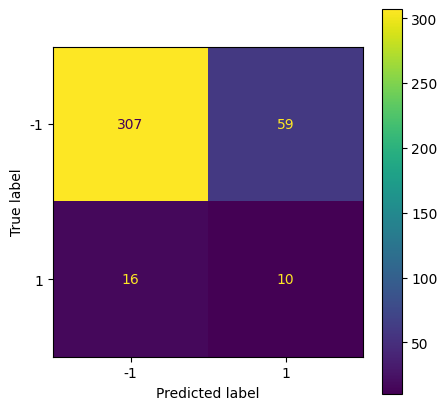

In [195]:
# Naive Bayes
nb = GaussianNB()
plot_result_smoted_fe(nb, "nb")

Average Balanced Accuracy (CV=10): 0.5515015015015015
              precision    recall  f1-score   support

          -1       0.98      0.35      0.51       366
           1       0.09      0.92      0.17        26

    accuracy                           0.39       392
   macro avg       0.54      0.64      0.34       392
weighted avg       0.93      0.39      0.49       392



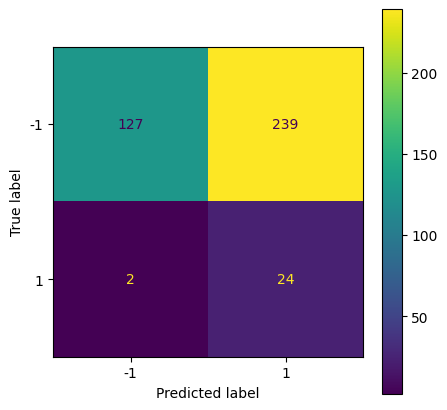

In [196]:
# kNN
knn = KNeighborsClassifier(n_neighbors=3)
plot_result_smoted_fe(knn, "knn")

In [197]:
df_eval_smote_fe = pd.DataFrame(data={'model': list(cv_acc_balance.keys()), 'bal_acc': list(cv_acc_balance.values()), 'recall': list(cv_TPR_balance.values()), 'fallout':list(cv_FPR_balance.values())})
df_eval_smote_fe

,model,bal_acc,recall,fallout
0,dtc,57.66,38.461538,9.289617
1,lr,50.59,19.230769,14.754098
2,svc,50.00,0.000000,0.546448
3,rfc,50.00,0.000000,0.546448
4,gbc,60.59,15.384615,3.005464
5,nb,58.27,73.076923,47.814208
6,knn,54.46,80.769231,70.491803


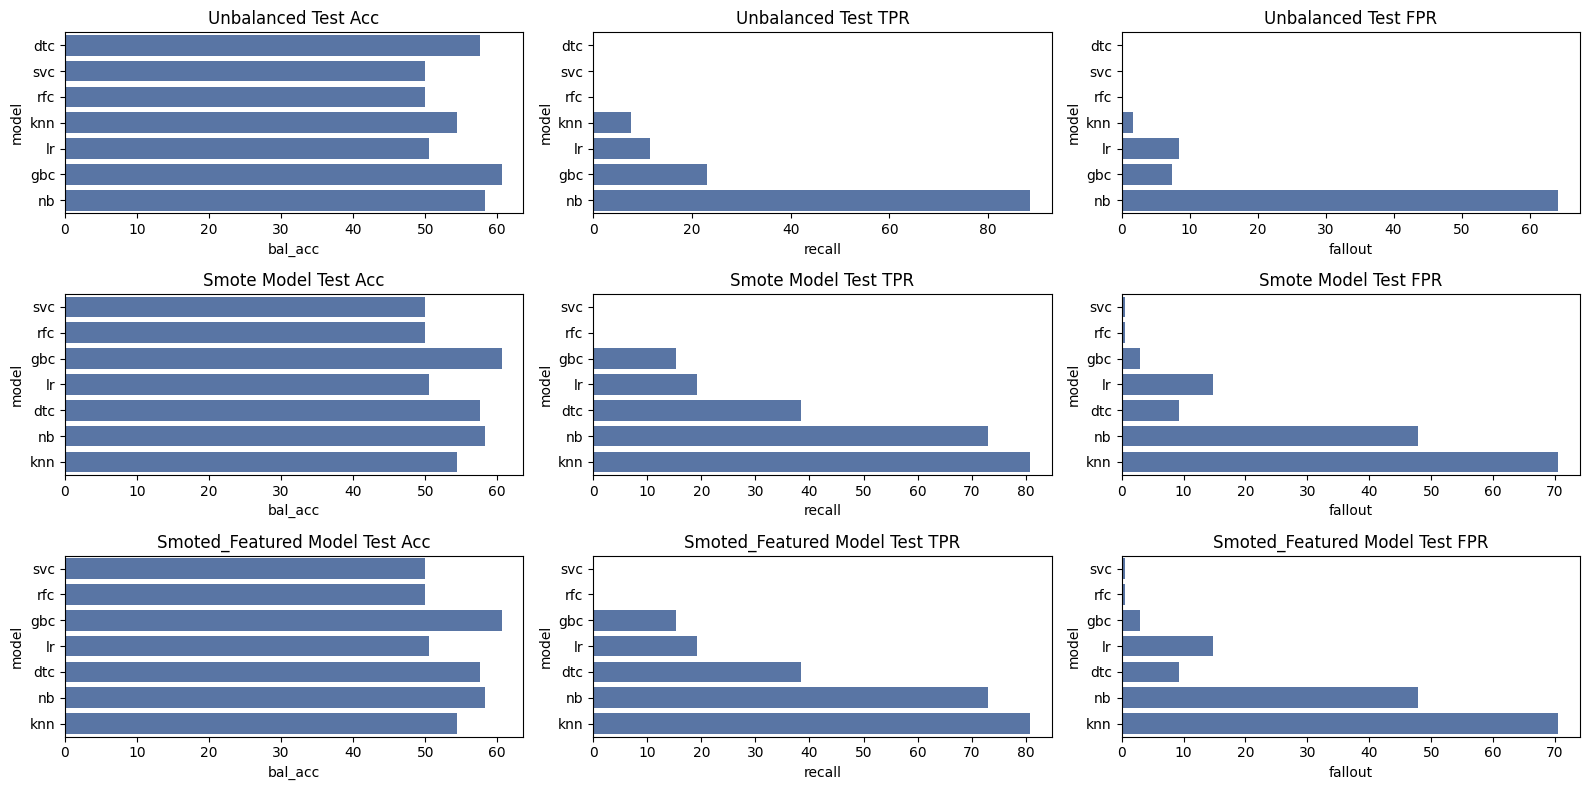

In [198]:
fig, ax = plt.subplots(3,3, figsize=(16, 8))
sns.barplot(x="bal_acc", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,0])
ax[0,0].set_title("Unbalanced Test Acc")
sns.barplot(x="recall", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,1])
ax[0,1].set_title("Unbalanced Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,2])
ax[0,2].set_title("Unbalanced Test FPR")

sns.barplot(x="bal_acc", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,0])
ax[1,0].set_title("Smote Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,1])
ax[1,1].set_title("Smote Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,2])
ax[1,2].set_title("Smote Model Test FPR")

sns.barplot(x="bal_acc", y="model", data=df_eval_smote_fe.sort_values(by="recall"), ax=ax[2,0])
ax[2,0].set_title("Smoted_Featured Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_smote_fe.sort_values(by="recall"), ax=ax[2,1])
ax[2,1].set_title("Smoted_Featured Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_smote_fe.sort_values(by="recall"), ax=ax[2,2])
ax[2,2].set_title("Smoted_Featured Model Test FPR")

plt.tight_layout()
plt.show()

##Iteration 4: (with SMOTE and PCA)

In [199]:
from sklearn.decomposition import PCA

In [200]:
X_train_os

array([[ 0.60276538, -0.35447884, -0.52058033, ..., -0.17639514,
        -0.5075407 , -0.38939963],
       [-0.0167734 ,  0.67593524,  0.55821396, ..., -0.84666272,
        -1.12816505, -0.38688076],
       [ 0.26887065,  0.47227047,  1.32658249, ...,  0.19065615,
        -0.92526863, -0.67370577],
       ...,
       [ 0.24185125,  0.37135369, -1.18675919, ..., -0.08612695,
        -0.62462725, -0.49503733],
       [ 0.17584947, -0.26042284,  0.47564125, ...,  1.57849303,
        -0.23438809, -0.67619252],
       [ 0.38893824, -0.47015793, -0.86102402, ..., -0.30663269,
        -0.18426815, -0.15890342]])

In [201]:
pca = PCA().fit(X_train_os)

we know that the principal components explain a part of the variance. From the Scikit-learn implementation, we can get the information about the explained variance and plot the cumulative variance. The PCA algorithm is going to standardize the input data frame, calculate the covariance matrix of the features. Thanks to Mikulski

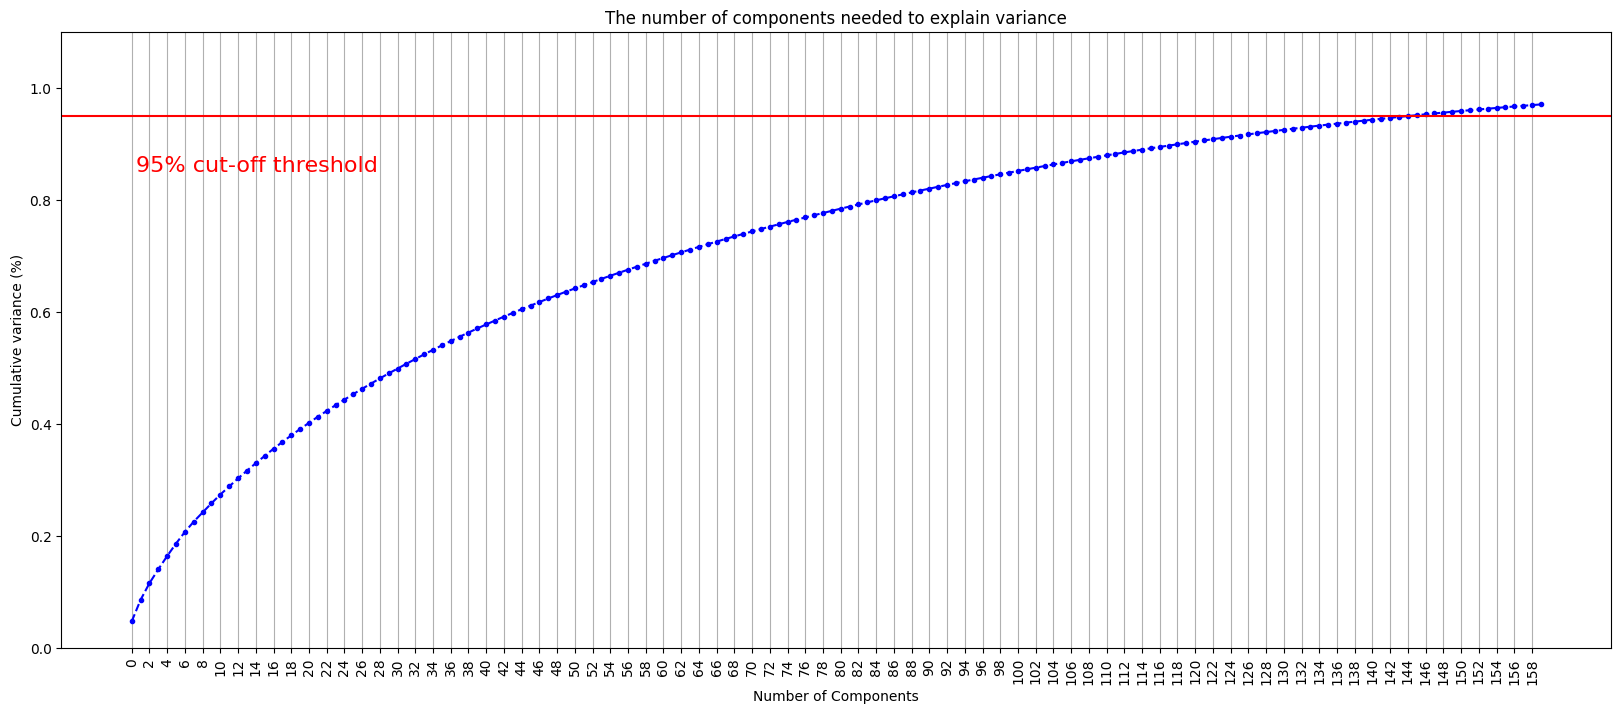

In [202]:
fig, ax = plt.subplots(figsize=(20,8))
xi = np.arange(0, 160, step=1)
y = np.cumsum(pca.explained_variance_ratio_[0:160:1])

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='.', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 160, step=2), rotation=90) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

It looks like n_components = 145 is suitable for% 95 total explained variance,

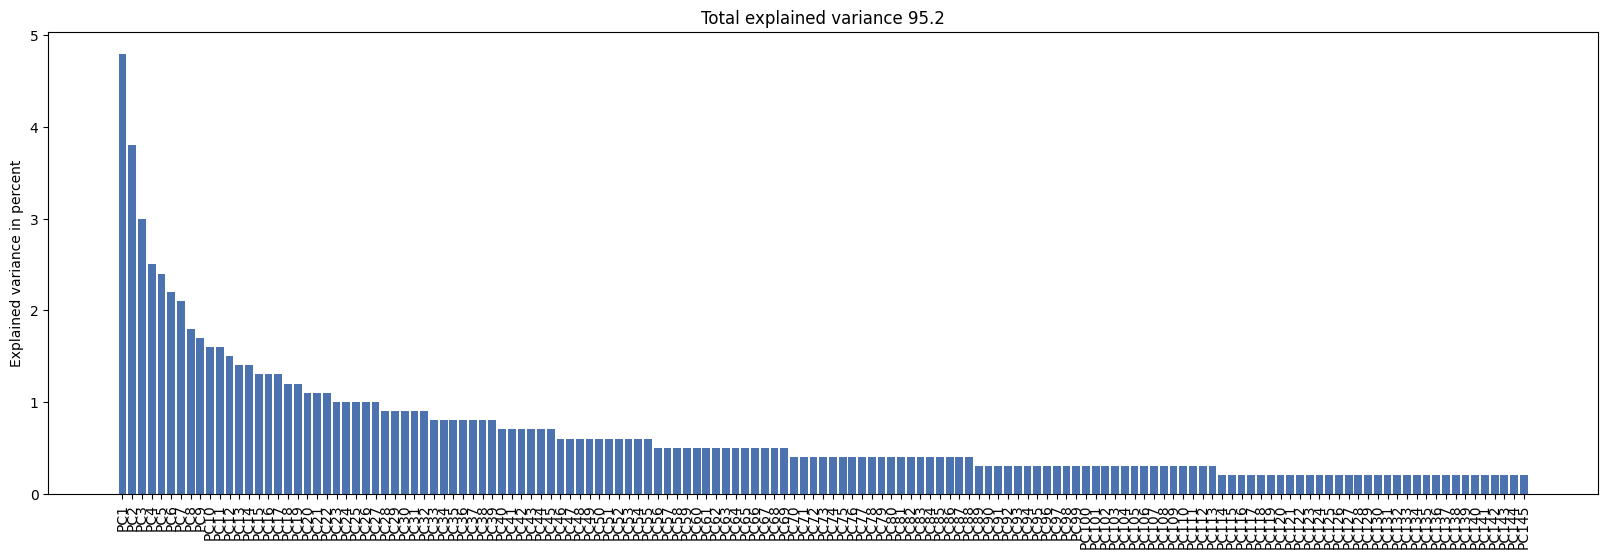

In [203]:
pca = PCA(n_components=145)
pca.fit(X_train_os)
per_var = np.round(pca.explained_variance_ratio_ * 100, 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.figure(figsize=(20,6))
plt.bar(x=range(len(per_var)), height=per_var, tick_label=labels)
plt.title('Total explained variance {}'.format(np.round(sum(per_var),2)))
plt.ylabel('Explained variance in percent')
plt.xticks(rotation=90)
plt.show()

In [204]:
X_train_os_pca = pca.transform(X_train_os)
pd.DataFrame(X_train_os_pca)

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,2.447820,-1.633081,-0.210873,-1.110137,-0.122666,0.203720,-2.321233,-0.726318,2.201464,1.067899,...,-0.999655,-0.112690,-0.389439,-0.863703,0.468160,-1.056962,0.261487,-1.332756,-0.404634,-1.023450
1,-1.187094,-1.386216,-0.199943,2.762734,-0.725822,2.109418,-2.429433,0.614099,0.347289,-0.684609,...,0.341108,-0.540149,0.124086,-0.936398,0.046806,0.218629,-0.219037,-0.205140,-0.920040,0.473129
2,1.894643,0.069794,-2.519290,0.296605,-2.644420,2.639762,-0.205253,0.472948,-1.112327,-0.986918,...,0.650927,-1.285473,0.539678,-0.200072,1.551233,0.380169,-0.316723,-0.291361,0.437596,0.988749
3,0.064826,-0.224241,-0.143541,0.147007,-1.667754,-1.260191,0.076347,-0.265330,-0.396012,-1.061216,...,-0.751176,-1.547777,-0.101866,0.098934,0.288821,-0.721773,1.374183,0.274494,0.897127,0.530416
4,-2.875651,1.164029,-2.620382,1.511843,-0.096906,0.681625,-0.046871,-0.388594,-0.768785,-0.494450,...,0.502697,0.582425,0.100602,1.412672,1.182534,0.270518,0.678445,-1.171745,-0.522786,0.330699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,0.237863,0.928138,-2.492672,0.524988,1.958072,-3.168453,-1.140853,-2.129128,0.782193,-0.562018,...,-0.214752,-0.126642,0.205422,-0.026399,-0.204988,-0.041857,0.141119,-0.158615,0.066262,0.092752
2190,-2.521234,2.242327,-0.598283,0.011806,-1.613557,-2.707603,3.504493,0.897594,-2.085150,-0.164968,...,-0.251837,0.207529,0.246642,0.262120,0.001783,-0.123373,0.043886,0.083205,-0.167707,-0.024838
2191,-3.228070,2.272174,0.738032,-0.284858,-0.369602,-2.403495,3.178765,0.735573,-2.063426,0.678714,...,-0.167973,0.287105,0.334023,-0.040683,-0.078229,-0.207575,-0.172747,0.193581,-0.228249,-0.044998
2192,3.163811,-0.784287,-3.840080,-2.737860,-0.612931,1.326382,2.025355,-2.197975,-1.584690,0.754332,...,0.294324,-0.177670,0.335145,-0.180041,0.133700,0.082263,-0.078327,-0.009843,-0.096004,0.231377




The loads (loading scores) indicate "how high a variable X loads on a factor Y".

(The i-th principal components can be selected via i in pca.components_ [0].)


In [205]:
# Top 20 columns that have the greatest impact
loading_scores = pd.Series(pca.components_[0], index=X.columns)
loading_scores.abs().sort_values(ascending=False)[:20]

,0
67,0.246021
59,0.225660
103,0.220714
63,0.201993
79,0.190801
68,0.187874
64,0.186656
510,0.186638
200,0.184323
78,0.173335


In [206]:
X_test_pca = pca.transform(X_test)

In [207]:
cv_acc_balance_pca = {}
cv_TPR_balance_pca = {}
cv_FPR_balance_pca = {}
cv_Precision_balance_pca = {}
cv_Fscore_balance_pca = {}

In [208]:
def plot_result_smoted_pca(model, name:str):
    model.fit(X_train_os_pca, y_train_os)
    y_pred = model.predict(X_test_pca)

    # Evaluation based on a 10-fold cross-validation
    scoring = ['balanced_accuracy', 'recall_macro']
    scores = cross_val_score(model, X_test_pca, y_test, cv=10, scoring = 'balanced_accuracy')
    cv_acc_balance_pca[name] = round(scores.mean(), 4)*100  # balanced accuracy
    cv_TPR_balance_pca[name] = (confusion_matrix(y_test, y_pred)[1][1]/confusion_matrix(y_test, y_pred)[1].sum())*100  # recall (max)
    cv_FPR_balance_pca[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())*100  # fallout (min)
    cm = confusion_matrix(y_test, y_pred)
    cv_Precision_balance_pca[name] = confusion_matrix(y_test, y_pred)[1][1]/(confusion_matrix(y_test, y_pred)[1][1]+confusion_matrix(y_test, y_pred)[0][1])
    cv_Fscore_balance_pca[name] = 2 * (cv_Precision_balance_pca[name] * cv_TPR_balance_pca[name]) / (cv_Precision_balance_pca[name] + cv_TPR_balance_pca[name])
    print('Average Balanced Accuracy (CV=10):', scores.mean())

    # print classification report
    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

Average Balanced Accuracy (CV=10): 0.5168543543543543
              precision    recall  f1-score   support

          -1       0.93      0.72      0.81       366
           1       0.05      0.23      0.09        26

    accuracy                           0.68       392
   macro avg       0.49      0.47      0.45       392
weighted avg       0.87      0.68      0.76       392



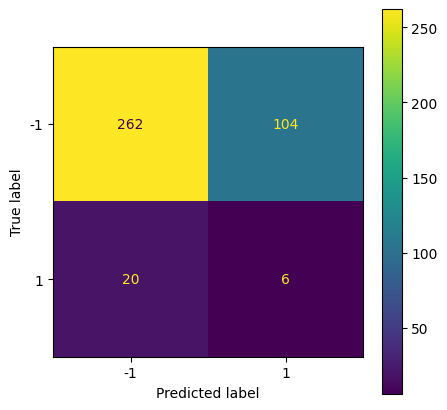

Average Balanced Accuracy (CV=10): 0.5256381381381381
              precision    recall  f1-score   support

          -1       0.94      0.85      0.89       366
           1       0.10      0.23      0.14        26

    accuracy                           0.81       392
   macro avg       0.52      0.54      0.52       392
weighted avg       0.88      0.81      0.84       392



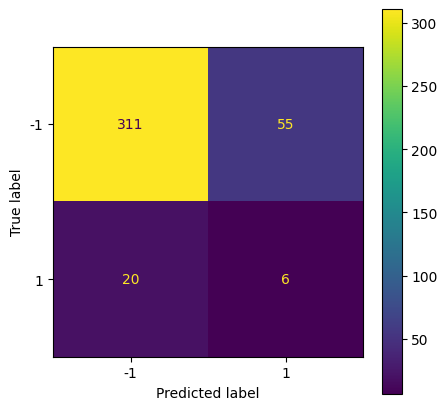

Average Balanced Accuracy (CV=10): 0.5
              precision    recall  f1-score   support

          -1       0.93      0.99      0.96       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



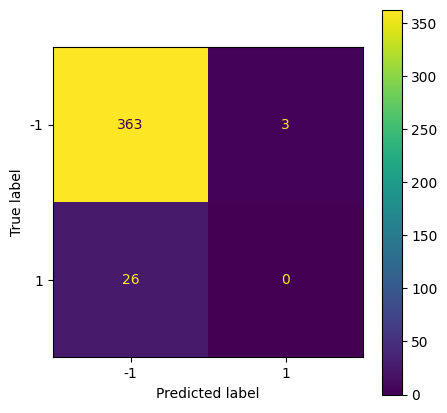

Average Balanced Accuracy (CV=10): 0.4986486486486486
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



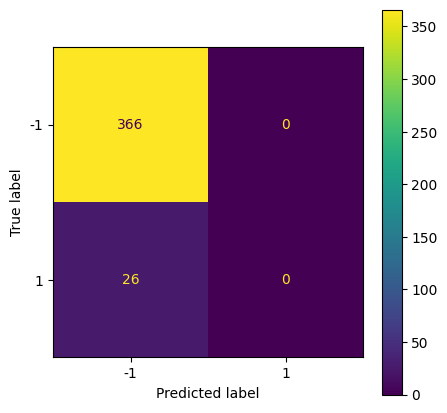

Average Balanced Accuracy (CV=10): 0.5449324324324325
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



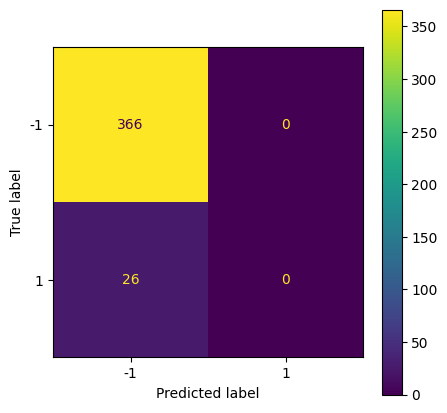

Average Balanced Accuracy (CV=10): 0.5543918918918918
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



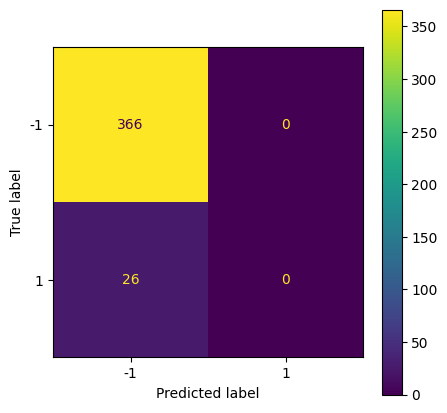

Average Balanced Accuracy (CV=10): 0.5278903903903904
              precision    recall  f1-score   support

          -1       0.96      0.40      0.56       366
           1       0.08      0.77      0.15        26

    accuracy                           0.42       392
   macro avg       0.52      0.58      0.36       392
weighted avg       0.90      0.42      0.53       392



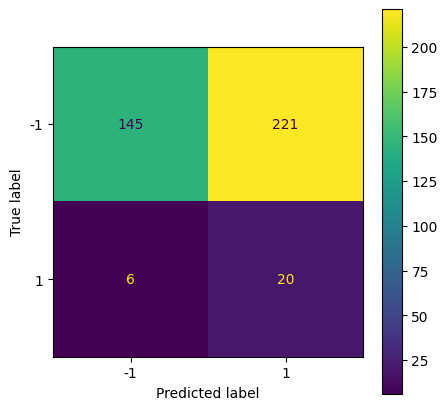

In [209]:
# Decision tree
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)
plot_result_smoted_pca(dtc, "dtc")


# Logistic Regression
lr = LogisticRegression(max_iter=200)
plot_result_smoted_pca(lr, "lr")



# SVC
svc = SVC(C=1.0, kernel='rbf', gamma='scale')  # default Werte
plot_result_smoted_pca(svc, "svc")



# Random Forest
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None)
plot_result_smoted_pca(rfc, "rfc")


# Gradient Boost
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=3, random_state=42)
plot_result_smoted_pca(gbc, "gbc")



# Naive Bayes
nb = GaussianNB()
plot_result_smoted_pca(nb, "nb")



# kNN
knn = KNeighborsClassifier(n_neighbors=3)
plot_result_smoted_pca(knn, "knn")

In [210]:
df_eval_smote_pca = pd.DataFrame(data={'model': list(cv_acc_balance.keys()), 'bal_acc': list(cv_acc_balance.values()), 'recall': list(cv_TPR_balance.values()), 'fallout':list(cv_FPR_balance.values())})
df_eval_smote_pca

,model,bal_acc,recall,fallout
0,dtc,57.66,38.461538,9.289617
1,lr,50.59,19.230769,14.754098
2,svc,50.00,0.000000,0.546448
3,rfc,50.00,0.000000,0.546448
4,gbc,60.59,15.384615,3.005464
5,nb,58.27,73.076923,47.814208
6,knn,54.46,80.769231,70.491803


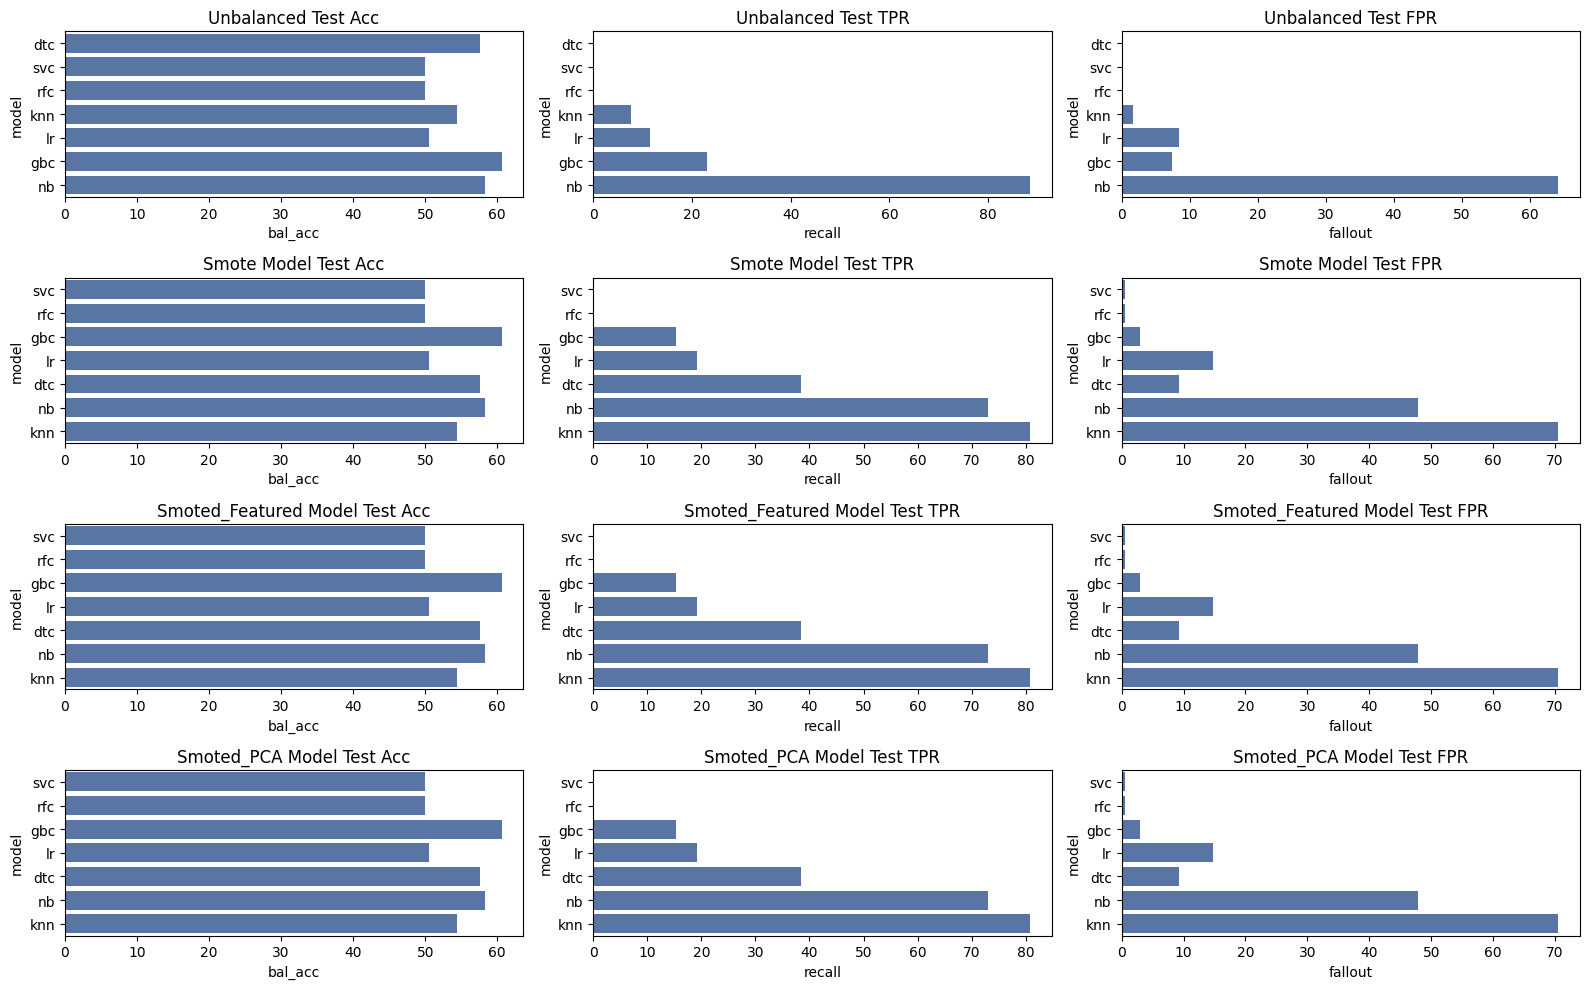

In [211]:
fig, ax = plt.subplots(4,3, figsize=(16, 10))

sns.barplot(x="bal_acc", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,0])
ax[0,0].set_title("Unbalanced Test Acc")
sns.barplot(x="recall", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,1])
ax[0,1].set_title("Unbalanced Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval.sort_values(by="recall"), ax=ax[0,2])
ax[0,2].set_title("Unbalanced Test FPR")

sns.barplot(x="bal_acc", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,0])
ax[1,0].set_title("Smote Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,1])
ax[1,1].set_title("Smote Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_smote.sort_values(by="recall"), ax=ax[1,2])
ax[1,2].set_title("Smote Model Test FPR")

sns.barplot(x="bal_acc", y="model", data=df_eval_smote_fe.sort_values(by="recall"), ax=ax[2,0])
ax[2,0].set_title("Smoted_Featured Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_smote_fe.sort_values(by="recall"), ax=ax[2,1])
ax[2,1].set_title("Smoted_Featured Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_smote_fe.sort_values(by="recall"), ax=ax[2,2])
ax[2,2].set_title("Smoted_Featured Model Test FPR")

sns.barplot(x="bal_acc", y="model", data=df_eval_smote_pca.sort_values(by="recall"), ax=ax[3,0])
ax[3,0].set_title("Smoted_PCA Model Test Acc")
sns.barplot(x="recall", y="model", data=df_eval_smote_pca.sort_values(by="recall"), ax=ax[3,1])
ax[3,1].set_title("Smoted_PCA Model Test TPR")
sns.barplot(x="fallout", y="model", data=df_eval_smote_pca.sort_values(by="recall"), ax=ax[3,2])
ax[3,2].set_title("Smoted_PCA Model Test FPR")

plt.tight_layout()
plt.show()

According to Smote and PCA, none of the models really gave relatively good results.

In [212]:
df_eval["type"] = "Unbalanced"
df_eval_smote["type"] = "Smote"
df_eval_smote_fe["type"] = "Smote_FE"
df_eval_smote_pca["type"] = "Smote_PCA"

In [213]:
frames = [df_eval, df_eval_smote, df_eval_smote_fe, df_eval_smote_pca]
df_result = pd.concat(frames, ignore_index=True)
df_result['model'] = df_result['model'].str.upper()
df_result[["recall", "fallout", "bal_acc"]] = df_result[["recall", "fallout", "bal_acc"]].apply(lambda x: np.round(x, 2))

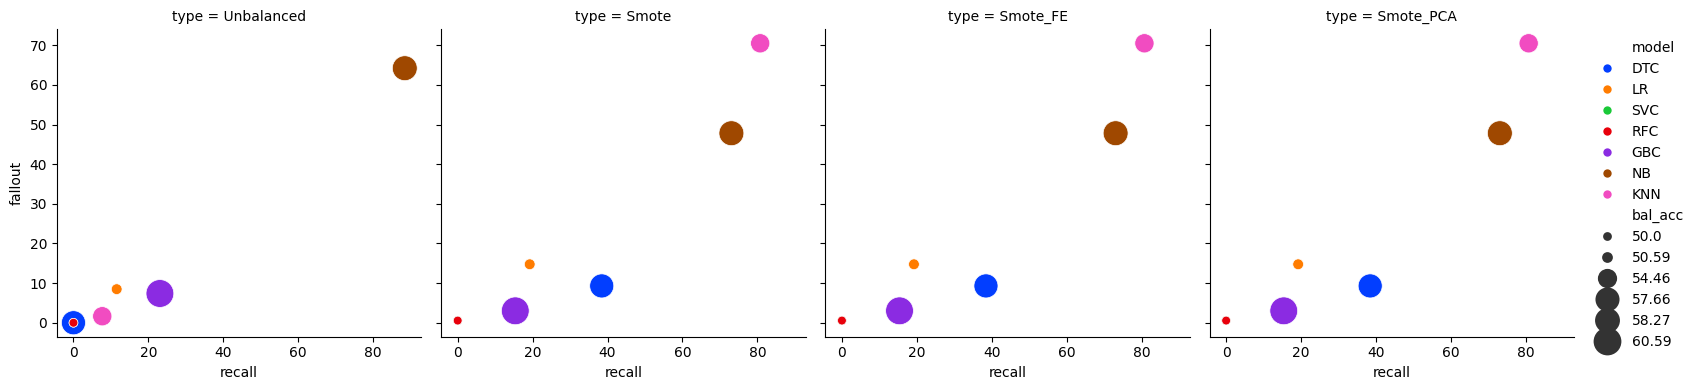

In [214]:
sns.relplot(x="recall", y="fallout", hue="model", size="bal_acc", sizes=(40, 400), col="type", alpha=1, palette="bright", height=4, legend='full', data=df_result)

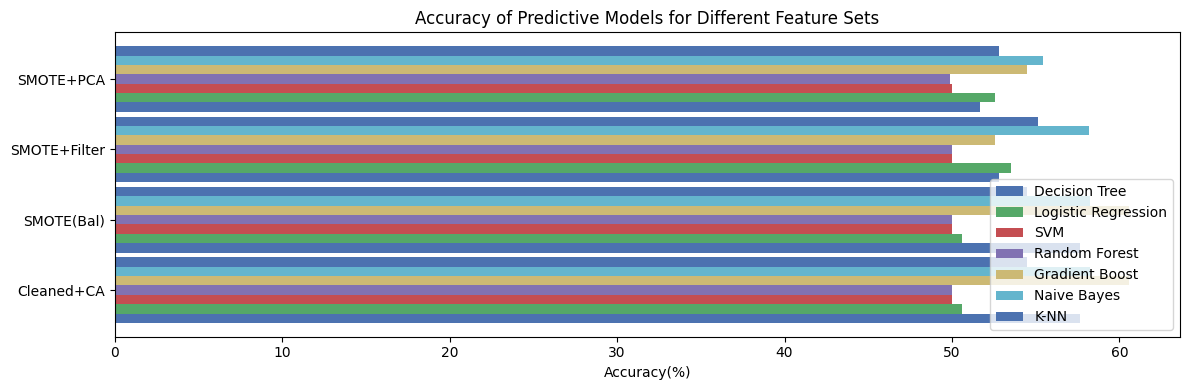

In [215]:
import matplotlib.pyplot as plt
import numpy as np

feature_sets = ['Cleaned+CA', 'SMOTE(Bal)', 'SMOTE+Filter', 'SMOTE+PCA']
models = ['Decision Tree', 'Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boost', 'Naive Bayes', 'K-NN']
precisions = np.array([list(cv_acc.values()), list(cv_acc_balance.values()), list(cv_acc_balance_fe.values()), list(cv_acc_balance_pca.values())])

# Plotting
fig, ax = plt.subplots(figsize=(12, 4))
bar_height = 0.2
spacing = 0.1  # Spacing between groups
index = np.arange(len(feature_sets)) * (len(models) * bar_height + spacing)

for i, model in enumerate(models):
    ax.barh(index + i * bar_height, precisions[:, i], bar_height, label=model)

#ax.set_ylabel('Feature Sets')
ax.set_xlabel('Accuracy(%)')
ax.set_title('Accuracy of Predictive Models for Different Feature Sets')
ax.set_yticks(index + bar_height * (len(models) - 1) / 2)
ax.set_yticklabels(feature_sets)
ax.legend()

plt.tight_layout()
plt.show()


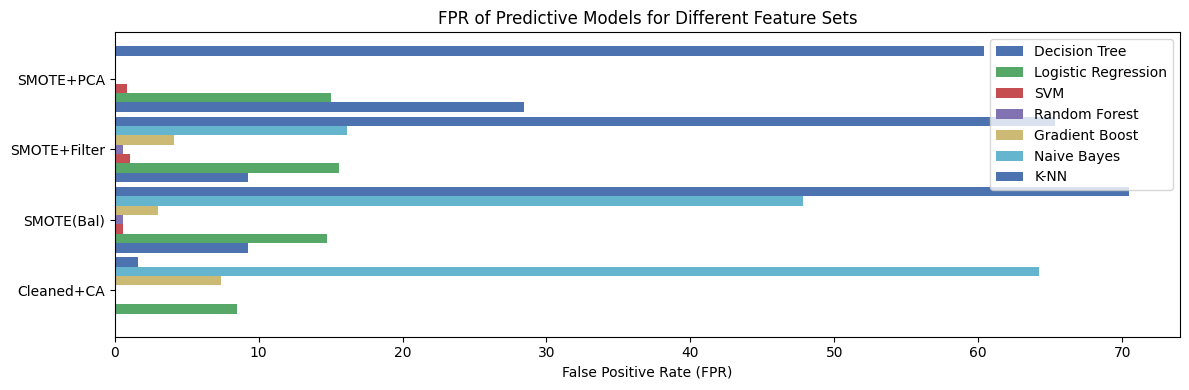

In [216]:
feature_sets = ['Cleaned+CA', 'SMOTE(Bal)', 'SMOTE+Filter', 'SMOTE+PCA']
models = ['Decision Tree', 'Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boost', 'Naive Bayes', 'K-NN']
precisions = np.array([list(cv_FPR.values()), list(cv_FPR_balance.values()), list(cv_FPR_balance_fe.values()), list(cv_FPR_balance_pca.values())])

# Plotting
fig, ax = plt.subplots(figsize=(12, 4))
bar_height = 0.2
spacing = 0.1  # Spacing between groups
index = np.arange(len(feature_sets)) * (len(models) * bar_height + spacing)

for i, model in enumerate(models):
    ax.barh(index + i * bar_height, precisions[:, i], bar_height, label=model)

#ax.set_ylabel('Feature Sets')
ax.set_xlabel('False Positive Rate (FPR)')
ax.set_title('FPR of Predictive Models for Different Feature Sets')
ax.set_yticks(index + bar_height * (len(models) - 1) / 2)
ax.set_yticklabels(feature_sets)
ax.legend()

plt.tight_layout()
plt.show()

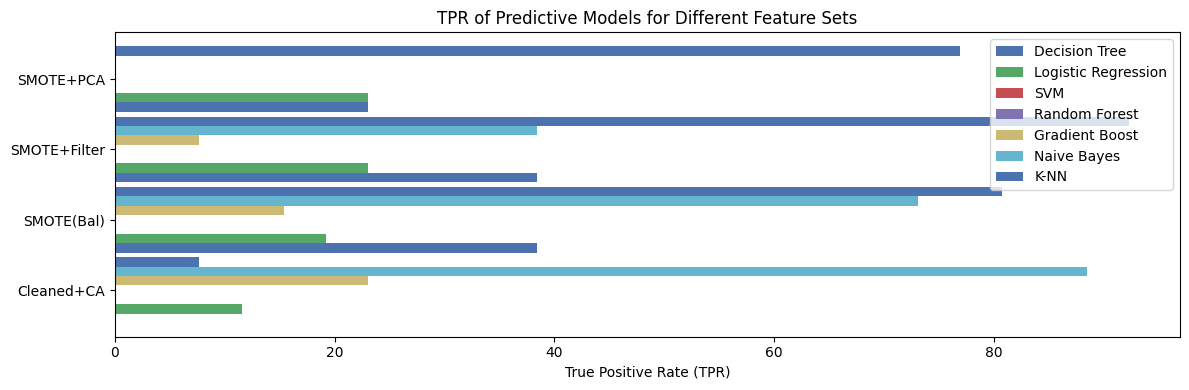

In [217]:
feature_sets = ['Cleaned+CA', 'SMOTE(Bal)', 'SMOTE+Filter', 'SMOTE+PCA']
models = ['Decision Tree', 'Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boost', 'Naive Bayes', 'K-NN']
precisions = np.array([list(cv_TPR.values()), list(cv_TPR_balance.values()), list(cv_TPR_balance_fe.values()), list(cv_TPR_balance_pca.values())])

# Plotting
fig, ax = plt.subplots(figsize=(12, 4))
bar_height = 0.2
spacing = 0.1  # Spacing between groups
index = np.arange(len(feature_sets)) * (len(models) * bar_height + spacing)

for i, model in enumerate(models):
    ax.barh(index + i * bar_height, precisions[:, i], bar_height, label=model)

#ax.set_ylabel('Feature Sets')
ax.set_xlabel('True Positive Rate (TPR)')
ax.set_title('TPR of Predictive Models for Different Feature Sets')
ax.set_yticks(index + bar_height * (len(models) - 1) / 2)
ax.set_yticklabels(feature_sets)
ax.legend()

plt.tight_layout()
plt.show()

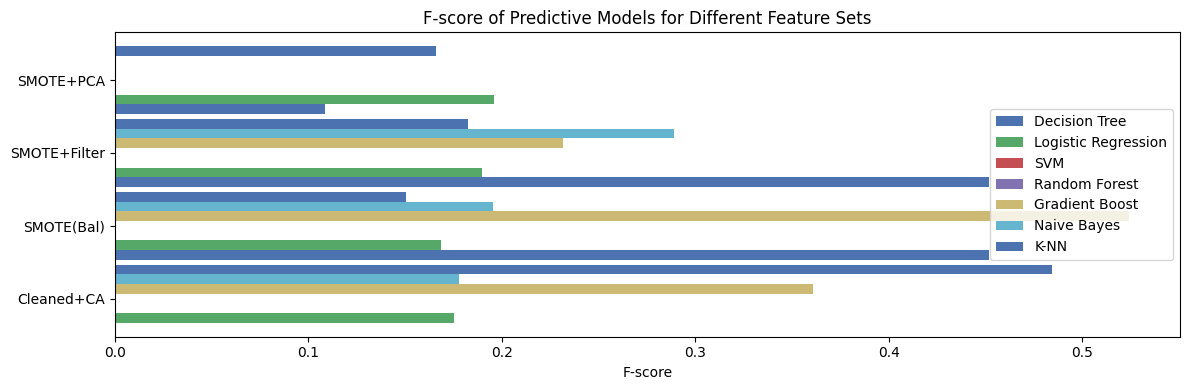

In [218]:
feature_sets = ['Cleaned+CA', 'SMOTE(Bal)', 'SMOTE+Filter', 'SMOTE+PCA']
models = ['Decision Tree', 'Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boost', 'Naive Bayes', 'K-NN']
precisions = np.array([list(cv_Fscore.values()), list(cv_Fscore_balance.values()), list(cv_Fscore_balance_fe.values()), list(cv_Fscore_balance_pca.values())])

# Plotting
fig, ax = plt.subplots(figsize=(12, 4))
bar_height = 0.2
spacing = 0.1  # Spacing between groups
index = np.arange(len(feature_sets)) * (len(models) * bar_height + spacing)

for i, model in enumerate(models):
    ax.barh(index + i * bar_height, precisions[:, i], bar_height, label=model)

#ax.set_ylabel('Feature Sets')
ax.set_xlabel('F-score')
ax.set_title('F-score of Predictive Models for Different Feature Sets')
ax.set_yticks(index + bar_height * (len(models) - 1) / 2)
ax.set_yticklabels(feature_sets)
ax.legend()

plt.tight_layout()
plt.show()

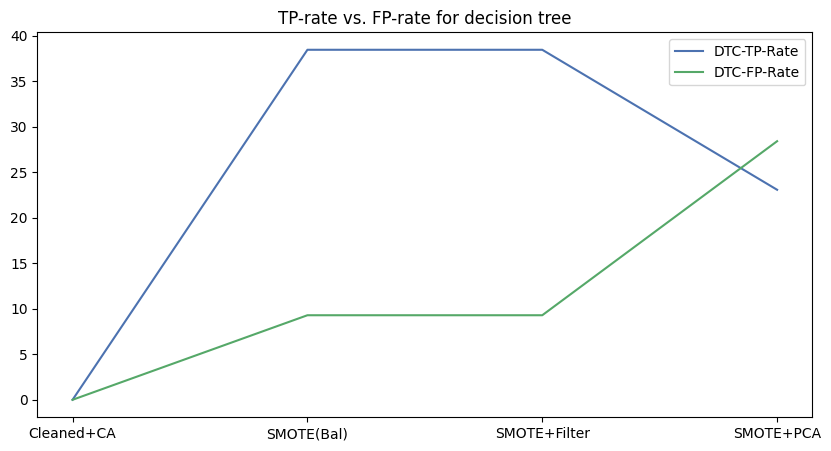

In [226]:
#TP-rate vs. FP-rate for decision tree
feature_sets = ['Cleaned+CA', 'SMOTE(Bal)', 'SMOTE+Filter', 'SMOTE+PCA']
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(feature_sets, list((cv_TPR['dtc'], cv_TPR_balance['dtc'], cv_TPR_balance_fe['dtc'], cv_TPR_balance_pca['dtc'])), label='DTC-TP-Rate')
ax.plot(feature_sets, list((cv_FPR['dtc'], cv_FPR_balance['dtc'], cv_FPR_balance_fe['dtc'], cv_FPR_balance_pca['dtc'])), label='DTC-FP-Rate')
ax.set_title('TP-rate vs. FP-rate for decision tree')
ax.legend()
plt.show()

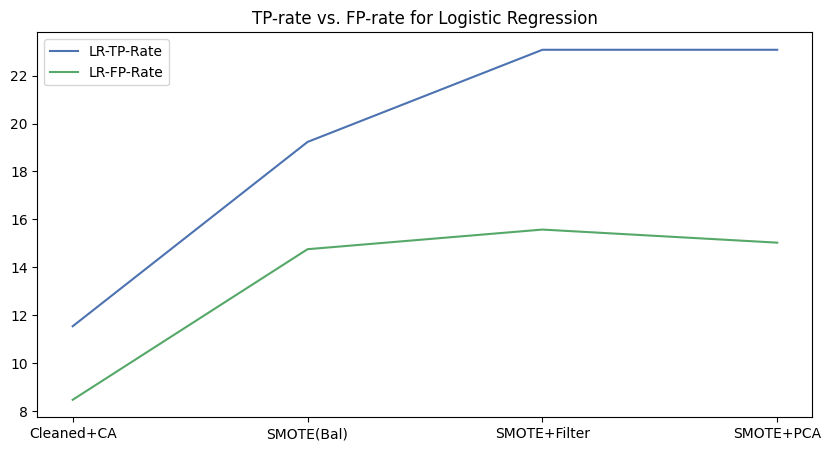

In [227]:
#TP-rate vs. FP-rate for decision tree
feature_sets = ['Cleaned+CA', 'SMOTE(Bal)', 'SMOTE+Filter', 'SMOTE+PCA']
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(feature_sets, list((cv_TPR['lr'], cv_TPR_balance['lr'], cv_TPR_balance_fe['lr'], cv_TPR_balance_pca['lr'])), label='LR-TP-Rate')
ax.plot(feature_sets, list((cv_FPR['lr'], cv_FPR_balance['lr'], cv_FPR_balance_fe['lr'], cv_FPR_balance_pca['lr'])), label='LR-FP-Rate')
ax.set_title('TP-rate vs. FP-rate for Logistic Regression')
ax.legend()
plt.show()

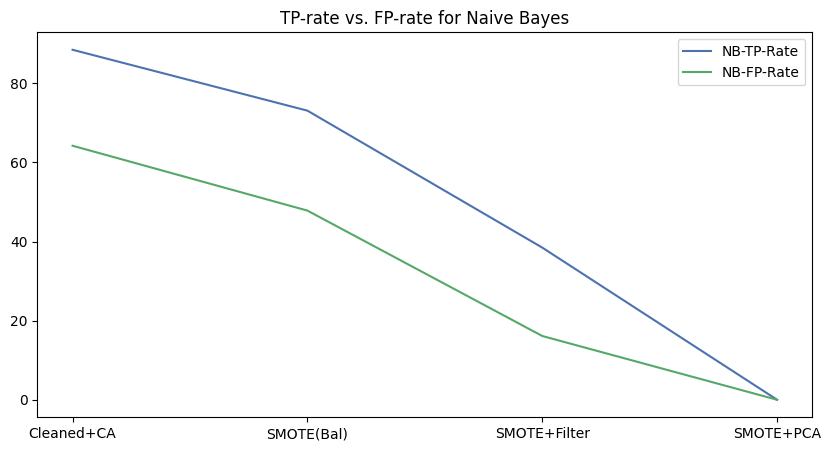

In [228]:
#TP-rate vs. FP-rate for decision tree
feature_sets = ['Cleaned+CA', 'SMOTE(Bal)', 'SMOTE+Filter', 'SMOTE+PCA']
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(feature_sets, list((cv_TPR['nb'], cv_TPR_balance['nb'], cv_TPR_balance_fe['nb'], cv_TPR_balance_pca['nb'])), label='NB-TP-Rate')
ax.plot(feature_sets, list((cv_FPR['nb'], cv_FPR_balance['nb'], cv_FPR_balance_fe['nb'], cv_FPR_balance_pca['nb'])), label='NB-FP-Rate')
ax.set_title('TP-rate vs. FP-rate for Naive Bayes')
ax.legend()
plt.show()

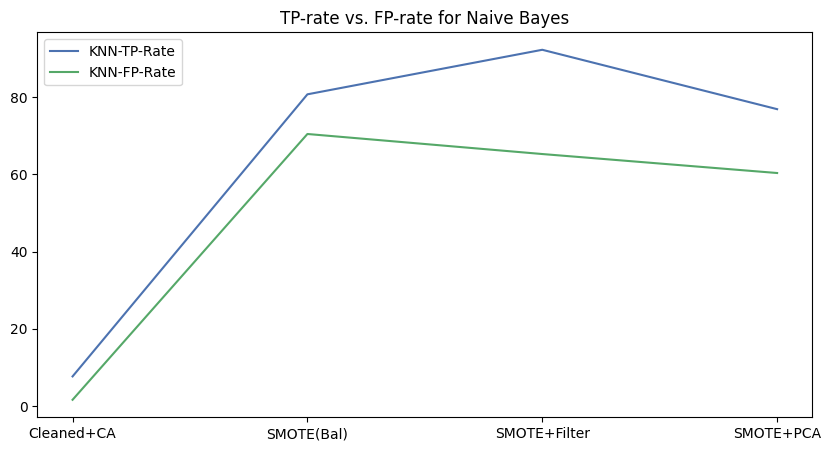

In [229]:
#TP-rate vs. FP-rate for decision tree
feature_sets = ['Cleaned+CA', 'SMOTE(Bal)', 'SMOTE+Filter', 'SMOTE+PCA']
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(feature_sets, list((cv_TPR['knn'], cv_TPR_balance['knn'], cv_TPR_balance_fe['knn'], cv_TPR_balance_pca['knn'])), label='KNN-TP-Rate')
ax.plot(feature_sets, list((cv_FPR['knn'], cv_FPR_balance['knn'], cv_FPR_balance_fe['knn'], cv_FPR_balance_pca['knn'])), label='KNN-FP-Rate')
ax.set_title('TP-rate vs. FP-rate for Naive Bayes')
ax.legend()
plt.show()